In [30]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np 
import matplotlib as plt

#Generate the Moon dataset
X,y = make_moons(n_samples=300,noise =0.2,random_state=120)
y=np.where(y==0,-1,1) # Convert labels to -1 and 1 for SVm-style training

#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Standardize features 
scaler =StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [31]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

#Train SVM
svm_model=SVC(kernel='poly',degree=3,C=1,random_state=42)
svm_model.fit(X_train,y_train)

#Evaluate SVM
y_pred_svm = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {svm_accuracy:.2f}")

SVM Accuracy: 0.84


##### Design a Neural Network to Mimic Polynomial Kernel

In [32]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

# Define a Neural Network
nn_model= Sequential([
    Dense(20,input_dim=2,activation='relu'), #First hidden layer
    Dense(20,activation='relu'),             #Second hidden layer
    Dense(10,activation='relu'),             #Third hidden layer 
    Dense(1,activation='tanh')               # Output layer (for binary classification)
])

#Compile Nerual Network
nn_model.compile(optimizer=Adam(learning_rate=0.01),loss='hinge',metrics=['accuracy'])

#Train Neural Network
nn_model.fit(X_train,y_train,epochs=100,batch_size=16,verbose=1)

#Evaluate Neural Network
y_pred_nn = nn_model.predict(X_test)
y_pred_nn = np.where(y_pred_nn > 0, 1, -1)  # Convert to binary predictions


nn_accuracy = accuracy_score(y_test, y_pred_nn)
print(f"Neural Network Accuracy: {nn_accuracy:.2f}")

Epoch 1/100
14/14 [==============================] - 1s 1ms/step - loss: 0.7276 - accuracy: 0.1286
Epoch 2/100
14/14 [==============================] - 0s 2ms/step - loss: 0.3115 - accuracy: 0.3857
Epoch 3/100
14/14 [==============================] - 0s 1ms/step - loss: 0.2737 - accuracy: 0.3857
Epoch 4/100
14/14 [==============================] - 0s 1ms/step - loss: 0.2606 - accuracy: 0.3810
Epoch 5/100
14/14 [==============================] - 0s 1ms/step - loss: 0.2598 - accuracy: 0.3857
Epoch 6/100
14/14 [==============================] - 0s 1ms/step - loss: 0.2369 - accuracy: 0.3952
Epoch 7/100
14/14 [==============================] - 0s 1ms/step - loss: 0.2331 - accuracy: 0.4000
Epoch 8/100
14/14 [==============================] - 0s 1ms/step - loss: 0.2340 - accuracy: 0.4048
Epoch 9/100
14/14 [==============================] - 0s 1ms/step - loss: 0.2531 - accuracy: 0.3905
Epoch 10/100
14/14 [==============================] - 0s 2ms/step - loss: 0.2246 - accuracy: 0.4000
Epoch 11/

##### Visualize Decision Boundaries

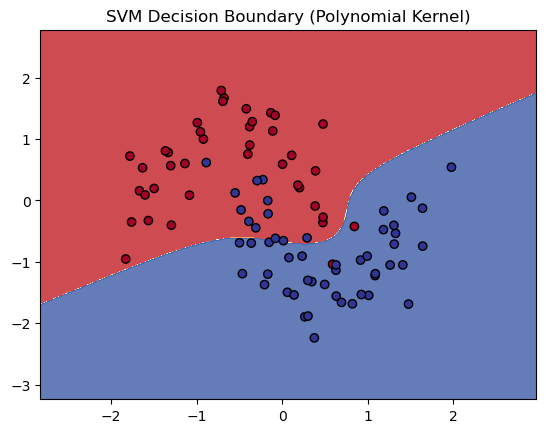

10949/10949 [==============================] - 11s 998us/step


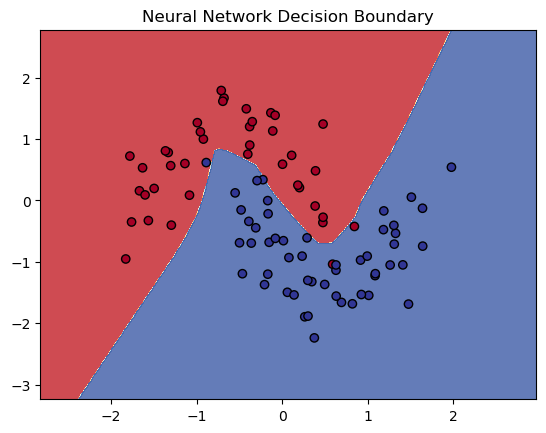

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot decision boundary
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    if len(Z.shape) > 1:
        Z = np.where(Z > 0, 1, -1)  # For Neural Network
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.RdYlBu)
    plt.title(title)
    plt.show()

# Plot SVM Decision Boundary
plot_decision_boundary(svm_model, X_test, y_test, "SVM Decision Boundary (Polynomial Kernel)")

# Plot Neural Network Decision Boundary
plot_decision_boundary(nn_model, X_test, y_test, "Neural Network Decision Boundary")